<a href="https://colab.research.google.com/github/sagyn19/nes1/blob/main/NES1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


github_url = "https://github.com/sagyn19/nes1/blob/main/fifa_players_nes1.xlsx"
url = github_url.replace("github.com", "raw.githubusercontent.com").replace("blob/", "")
df = pd.read_excel(url)


def simplify_position(pos_str):
    pos_str = pos_str.upper()
    if "GK" in pos_str:
        return "GK"
    elif any(p in pos_str for p in ["CB", "LB", "RB", "LWB", "RWB"]):
        return "D"
    elif any(p in pos_str for p in ["CM", "CDM", "CAM", "LM", "RM"]):
        return "M"
    elif any(p in pos_str for p in ["CF", "ST", "LW", "RW"]):
        return "F"
    return "Other"

df["main_position"] = df["positions"].apply(simplify_position)

# D, M, F players
df_filtered = df[df["main_position"].isin(["D", "M", "F"])].copy()


feature_columns = [
    'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
    'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control',
    'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
    'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
    'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
    'composure', 'marking', 'standing_tackle', 'sliding_tackle'
]

X = df_filtered[feature_columns].values
y = df_filtered["main_position"].map({"D": 0, "M": 1, "F": 2}).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train (70%), Validation (15%), Test (15%)
X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Overall shape", df.shape)
print("Train shape:", X_train_full.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Overall shape (498, 52)
Train shape: (317, 29)
Validation shape: (68, 29)
Test shape: (68, 29)


In [2]:
import matplotlib.pyplot as plt


def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()



 Running Model 1 with layers [32, 16], dropout=0, batch_size=32
Test accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

    Defender       0.96      1.00      0.98        24
  Midfielder       0.94      0.94      0.94        32
     Forward       0.91      0.83      0.87        12

    accuracy                           0.94        68
   macro avg       0.94      0.92      0.93        68
weighted avg       0.94      0.94      0.94        68



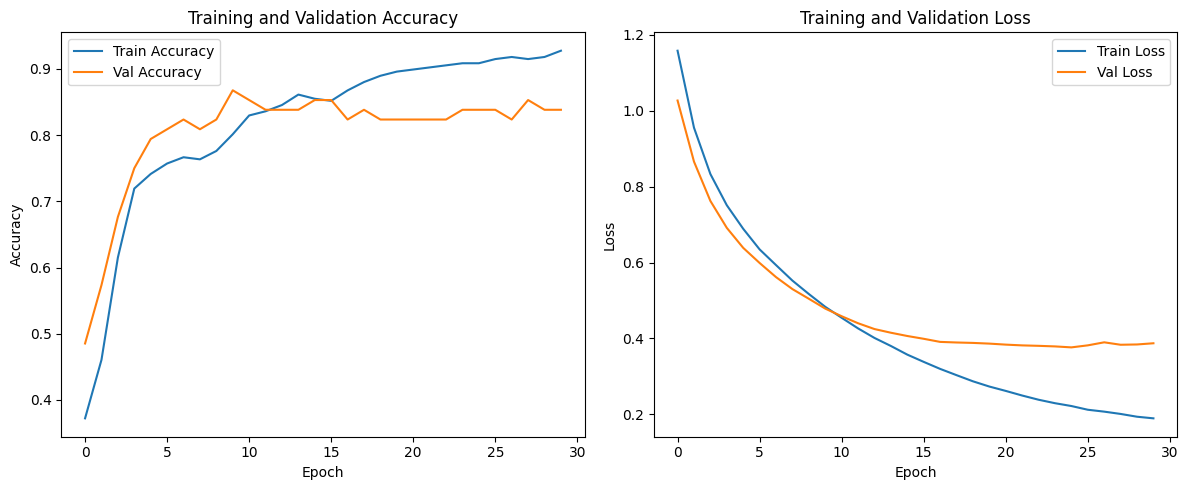

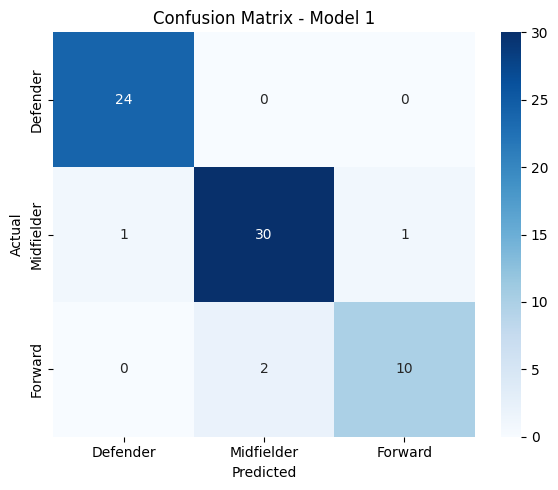


 Running Model 2 with layers [32, 16], dropout=0.5, batch_size=16
Test accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

    Defender       0.92      1.00      0.96        24
  Midfielder       0.93      0.88      0.90        32
     Forward       0.83      0.83      0.83        12

    accuracy                           0.91        68
   macro avg       0.90      0.90      0.90        68
weighted avg       0.91      0.91      0.91        68



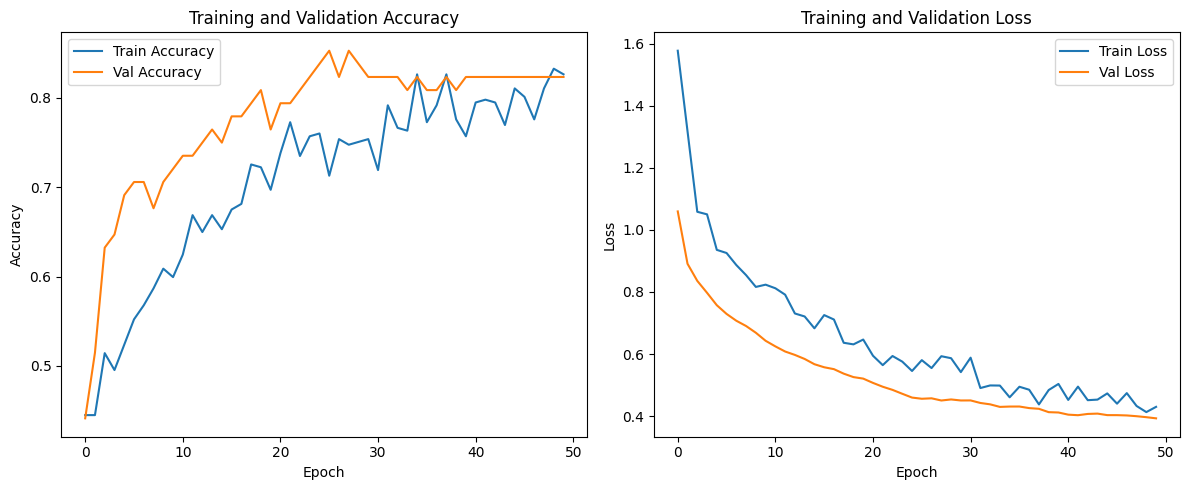

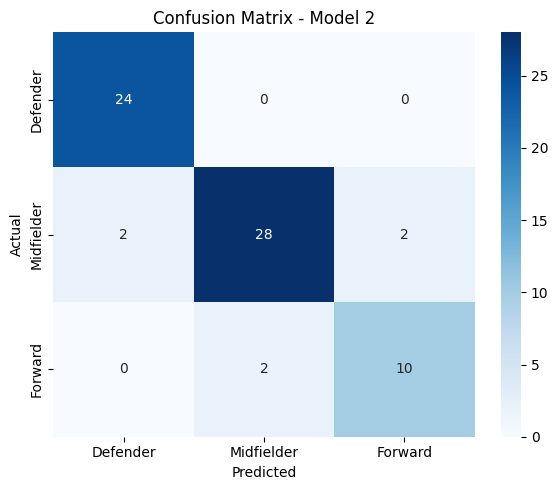


 Running Model 3 with layers [64, 32], dropout=0.3, batch_size=32


Test accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

    Defender       0.96      1.00      0.98        24
  Midfielder       0.94      0.94      0.94        32
     Forward       0.91      0.83      0.87        12

    accuracy                           0.94        68
   macro avg       0.94      0.92      0.93        68
weighted avg       0.94      0.94      0.94        68



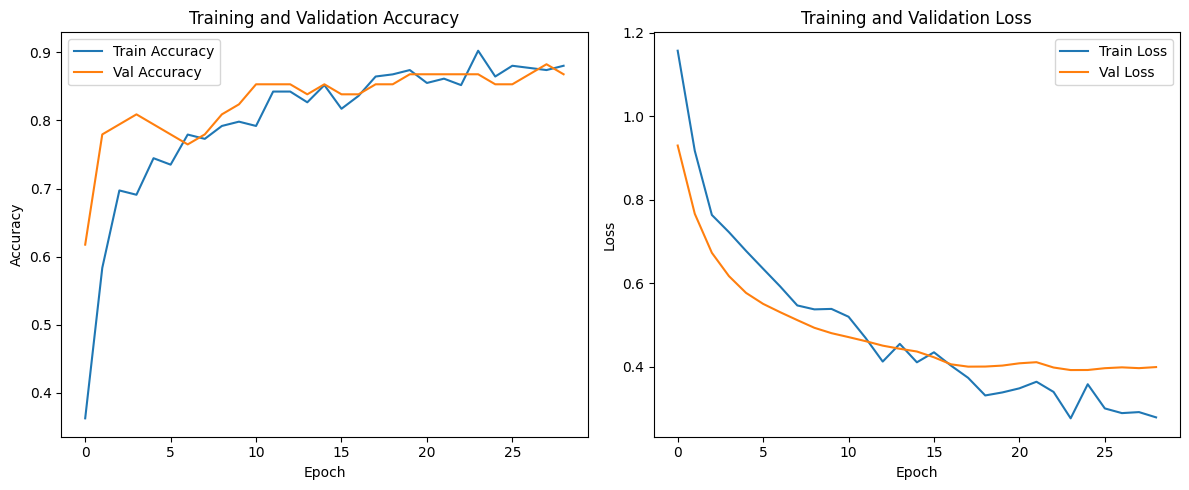

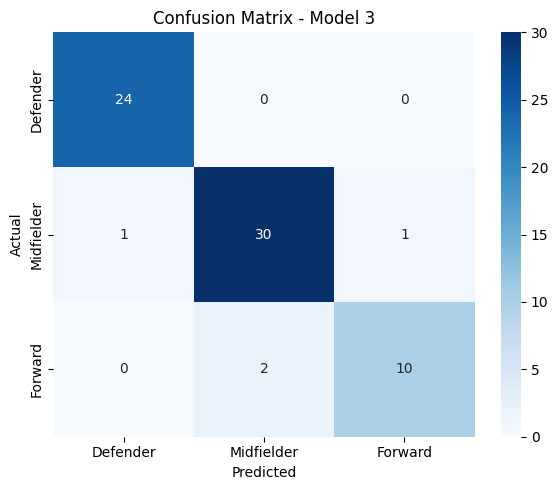


 Running Model 4 with layers [128, 64], dropout=0.4, batch_size=64
Test accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

    Defender       0.96      1.00      0.98        24
  Midfielder       0.94      0.91      0.92        32
     Forward       0.83      0.83      0.83        12

    accuracy                           0.93        68
   macro avg       0.91      0.91      0.91        68
weighted avg       0.93      0.93      0.93        68



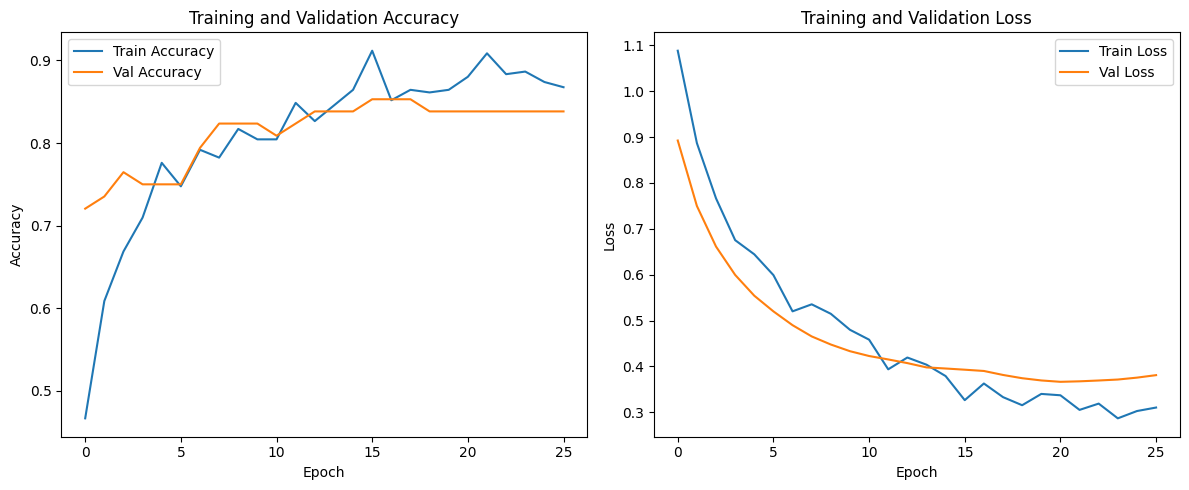

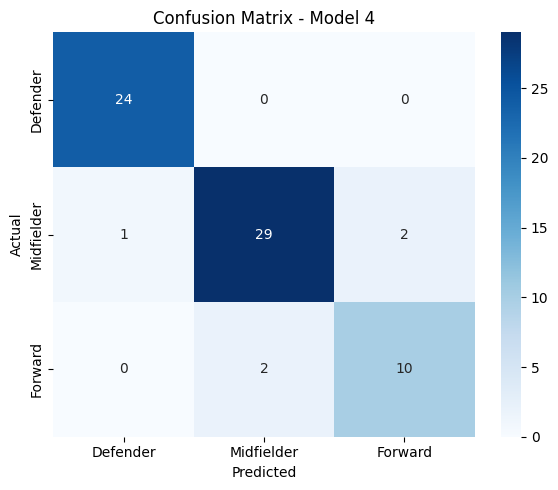


 Running Model 5 with layers [64], dropout=0.2, batch_size=32
Test accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

    Defender       0.96      0.96      0.96        24
  Midfielder       0.91      0.94      0.92        32
     Forward       0.91      0.83      0.87        12

    accuracy                           0.93        68
   macro avg       0.93      0.91      0.92        68
weighted avg       0.93      0.93      0.93        68



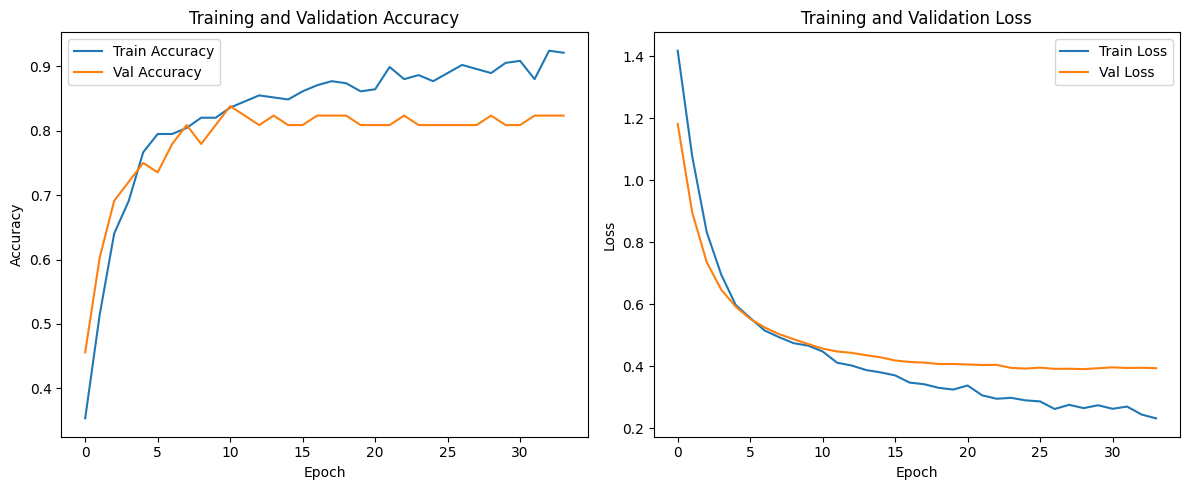

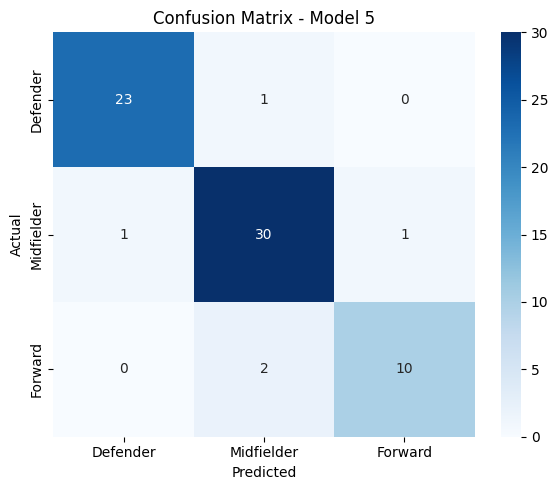


📊 Hyperparameter Summary Table:
     Model     Layers  Dropout  Batch Size  Test Accuracy  \
0  Model 1   [32, 16]      0.0          32         0.9412   
1  Model 2   [32, 16]      0.5          16         0.9118   
2  Model 3   [64, 32]      0.3          32         0.9412   
3  Model 4  [128, 64]      0.4          64         0.9265   
4  Model 5       [64]      0.2          32         0.9265   

   F1 Score (Macro Avg)  Training Time (s)  
0                0.9289               9.59  
1                0.8989              12.60  
2                0.9289               8.24  
3                0.9112               5.38  
4                0.9170               7.23  


In [4]:
import numpy as np
import pandas as pd
import time
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

summary = []

#configurations
configs = [
    {"layers": [32, 16], "dropout": 0, "batch_size": 32},
    {"layers": [32, 16], "dropout": 0.5, "batch_size": 16},
    {"layers": [64, 32], "dropout": 0.3, "batch_size": 32},
    {"layers": [128, 64], "dropout": 0.4, "batch_size": 64},
    {"layers": [64], "dropout": 0.2, "batch_size": 32}
]


for i, config in enumerate(configs, 1):
    print(f"\n Running Model {i} with layers {config['layers']}, dropout={config['dropout']}, batch_size={config['batch_size']}")

    model = Sequential()
    model.add(layers.Input(shape=(X_train_full.shape[1],)))

    for neurons in config["layers"]:
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(config["dropout"]))

    model.add(Dense(3, activation='softmax'))  # Output layer

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    start_time = time.time()
    history = model.fit(
        X_train_full, y_train_full,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=config["batch_size"],
        verbose=0,
        callbacks=[early_stop]
    )
    end_time = time.time()
    training_time = round(end_time - start_time, 2)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy: {test_acc:.2f}")


    y_pred_probs = model.predict(X_test, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Save summary info
    summary.append({
        "Model": f"Model {i}",
        "Layers": str(config["layers"]),
        "Dropout": config["dropout"],
        "Batch Size": config["batch_size"],
        "Test Accuracy": round(test_acc, 4),
        "F1 Score (Macro Avg)": round(
            classification_report(y_test, y_pred, output_dict=True)["macro avg"]["f1-score"], 4
        ),
        "Training Time (s)": training_time
    })


    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Defender", "Midfielder", "Forward"]))
    plot_training_history(history)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Defender", "Midfielder", "Forward"],
                yticklabels=["Defender", "Midfielder", "Forward"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Model {i}')
    plt.tight_layout()
    plt.show()


summary_df = pd.DataFrame(summary)
print("\n📊 Hyperparameter Summary Table:")
print(summary_df)


              precision    recall  f1-score   support

    Defender       1.00      0.96      0.98        24
  Midfielder       0.91      0.91      0.91        32
     Forward       0.77      0.83      0.80        12

    accuracy                           0.91        68
   macro avg       0.89      0.90      0.89        68
weighted avg       0.92      0.91      0.91        68



<Axes: >

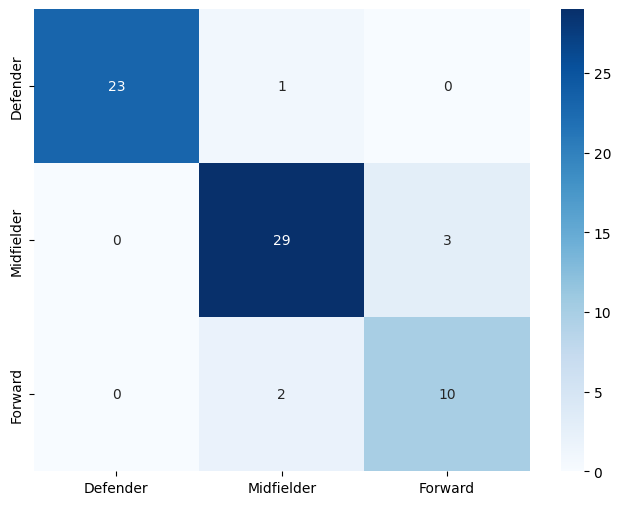

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_full, y_train_full)

y = df_filtered["main_position"].map({"D": 0, "M": 1, "F": 2}).values

target_names = ["Defender", "Midfielder", "Forward"]

print(classification_report(y_test, y_pred, target_names=target_names))


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
